<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/notebooks/09_13_%E8%87%89%E9%83%A8%E9%A9%97%E8%AD%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 臉部驗證

## 使用Face-Recognition套件

## 載入相關套件

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
%cd /app/DL_Book/src

Mounted at /content/gdrive
/content/gdrive/My Drive/DL_Book/src


In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=a6907879a9683098f3ccd11b169af0dc150f8350dd5e07d7a546b2eb81de7b0a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
# 載入相關套件
import face_recognition
import numpy as np
from matplotlib import pyplot as plt

## 載入並顯示圖檔

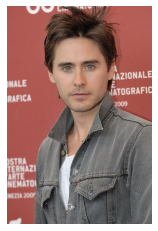

In [4]:
# 載入圖檔
known_image_1 = face_recognition.load_image_file("../images_face/jared_1.jpg")
known_image_2 = face_recognition.load_image_file("../images_face/jared_2.jpg")
known_image_3 = face_recognition.load_image_file("../images_face/jared_3.jpg")
known_image_4 = face_recognition.load_image_file("../images_face/obama.jpg")

# 標記圖檔名稱
names = ["jared_1.jpg", "jared_2.jpg", "jared_3.jpg", "obama.jpg"]

# 顯示圖像
unknown_image = face_recognition.load_image_file("../images_face/jared_4.jpg")
plt.imshow(unknown_image)
plt.axis('off')
plt.show()

## 圖像編碼

In [5]:
# 圖像編碼
known_image_1_encoding = face_recognition.face_encodings(known_image_1)[0]
known_image_2_encoding = face_recognition.face_encodings(known_image_2)[0]
known_image_3_encoding = face_recognition.face_encodings(known_image_3)[0]
known_image_4_encoding = face_recognition.face_encodings(known_image_4)[0]
known_encodings = [known_image_1_encoding, known_image_2_encoding, 
                   known_image_3_encoding, known_image_4_encoding]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

In [6]:
# 比對
results = face_recognition.compare_faces(known_encodings, unknown_encoding)
print(results)

[True, True, True, False]


## 使用dlib套件

## 載入相關套件

In [7]:
# 載入相關套件
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
!pip install dlib

In [9]:
%cd /app/DL_Book/src

/content/gdrive/My Drive/DL_Book/src


## 載入模型

In [10]:
# 載入模型
import dlib
pose_predictor_5_point = dlib.shape_predictor("../data/shape_predictor_5_face_landmarks.dat")
face_encoder = dlib.face_recognition_model_v1("../data/dlib_face_recognition_resnet_model_v1.dat")
detector = dlib.get_frontal_face_detector()

## 定義臉部編碼及比對的函數

In [11]:
# 找出哪一張臉最相似
def compare_faces_ordered(encodings, face_names, encoding_to_check):
    distances = list(np.linalg.norm(encodings - encoding_to_check, axis=1))
    return zip(*sorted(zip(distances, face_names)))


# 利用線性代數的法向量比較兩張臉的特徵點
def compare_faces(encodings, encoding_to_check):
    return list(np.linalg.norm(encodings - encoding_to_check, axis=1))

# 圖像編碼
def face_encodings(face_image, number_of_times_to_upsample=1, num_jitters=1):
    # 偵測臉部
    face_locations = detector(face_image, number_of_times_to_upsample)
    # 偵測臉部特徵點
    raw_landmarks = [pose_predictor_5_point(face_image, face_location) 
                     for face_location in face_locations]
    # 編碼
    return [np.array(face_encoder.compute_face_descriptor(face_image, 
                                    raw_landmark_set, num_jitters)) for
                                    raw_landmark_set in raw_landmarks]

## 載入圖檔並顯示

In [12]:
# 載入圖檔
known_image_1 = cv2.imread("../images_face/jared_1.jpg")
known_image_2 = cv2.imread("../images_face/jared_2.jpg")
known_image_3 = cv2.imread("../images_face/jared_3.jpg")
known_image_4 = cv2.imread("../images_face/obama.jpg")
unknown_image = cv2.imread("../images_face/jared_4.jpg")
names = ["jared_1.jpg", "jared_2.jpg", "jared_3.jpg", "obama.jpg"]

# 轉換 BGR 為 RGB
known_image_1 = known_image_1[:, :, ::-1]
known_image_2 = known_image_2[:, :, ::-1]
known_image_3 = known_image_3[:, :, ::-1]
known_image_4 = known_image_4[:, :, ::-1]
unknown_image = unknown_image[:, :, ::-1]

## 圖像編碼

In [13]:
# 圖像編碼
known_image_1_encoding = face_encodings(known_image_1)[0]
known_image_2_encoding = face_encodings(known_image_2)[0]
known_image_3_encoding = face_encodings(known_image_3)[0]
known_image_4_encoding = face_encodings(known_image_4)[0]
known_encodings = [known_image_1_encoding, known_image_2_encoding, 
                   known_image_3_encoding, known_image_4_encoding]
unknown_encoding = face_encodings(unknown_image)[0]

In [14]:
# 比對
computed_distances = compare_faces(known_encodings, unknown_encoding)
computed_distances_ordered, ordered_names = compare_faces_ordered(known_encodings, 
                                                      names, unknown_encoding)
print('比較兩張臉的法向量距離：', computed_distances)
print('排序：', computed_distances_ordered)
print('依相似度排序：', ordered_names)

比較兩張臉的法向量距離： [0.3998326700265651, 0.41041538984538495, 0.3913188139970749, 0.9053701470825026]
排序： (0.3913188139970749, 0.3998326700265651, 0.41041538984538495, 0.9053701470825026)
依相似度排序： ('jared_3.jpg', 'jared_1.jpg', 'jared_2.jpg', 'obama.jpg')
